In [1]:
"""
Predict albedo and shading layer of an input image.
"""

import os
import sys
sys.path.append('./util')
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

__author__ = "Udo Dehm"
__copyright__ = "Copyright 2017"
__credits__ = ["Udo Dehm"]
__license__ = ""
__version__ = "0.1"
__maintainer__ = "Udo Dehm"
__email__ = "udo.dehm@mailbox.org"
__status__ = "Development"

In [2]:
def import_data_sintel(data_directory):
    dfs_train = {}
    dfs_valid = {}
    for file in os.listdir(data_directory):
        df_name = 'df_' + file[10:-4].replace('loss_', '').replace('_1', '').replace('invariant', 'inv')
        if 'valid' in file:
            df_name = df_name.replace('valid_', '')
            dfs_valid[df_name] = pd.read_csv(filepath_or_buffer=data_directory + file)
            dfs_valid[df_name].columns = dfs_valid[df_name].columns.str.replace(" ", "_").str.lower()
            dfs_valid[df_name]['wall_time'] = pd.to_datetime(dfs_valid[df_name]['wall_time'],unit='s')
        else:
            df_name = df_name.replace('_loss', '')
            if '_lambda' in df_name:
                df_name = df_name[:df_name.find('_lambda')]
            dfs_train[df_name] = pd.read_csv(filepath_or_buffer=data_directory + file)
            dfs_train[df_name].columns = dfs_train[df_name].columns.str.replace(" ", "_").str.lower()
            dfs_train[df_name]['wall_time'] = pd.to_datetime(dfs_train[df_name]['wall_time'],unit='s')
    return dfs_train, dfs_valid


def plot_all_loss_pairs(dfs_train, dfs_valid, logy=False, ylim_scale=5):
    for key in dfs_train:
        fig = plt.figure
        ax = dfs_train[key].plot(x='step', y='value', figsize=(12,7), 
                                 fontsize=14, legend=True, style='-o',
                                 title=key[3:], logy=logy)
        dfs_valid[key].plot(x='step', y='value', style='-o', ax=ax)
        ax.set_xlabel('step')
        ax.set_ylabel('loss')
        plt.ylim(0,ylim_scale*dfs_train[key]['value'].max())
        ax.legend(["training set", "validation set"], prop={'size': 14})
        # plt.savefig('foo.png', bbox_inches='tight')

In [3]:
logs_data_path = '/home/udo/image_decomposition/logs/logs_data/'

# Sintel:

In [4]:
logs_data_path_sintel = logs_data_path + 'sintel/'

## Resnet-50 deconv decoder (1 scale):

In [17]:
logs_data_path_s1 = logs_data_path_sintel + 'slim_resnet_v1_50_deconv_decoder/1/'
logs_data_path_s2 = logs_data_path_sintel + 'slim_resnet_v1_50_deconv_decoder/2/'

lst = import_data_sintel(data_directory=logs_data_path_s1)
dfs_train_resnet_v1_50_deconv_decoder_1, dfs_valid_resnet_v1_50_deconv_decoder_1 = lst

lst = import_data_sintel(data_directory=logs_data_path_s2)
dfs_train_resnet_v1_50_deconv_decoder_2, dfs_valid_resnet_v1_50_deconv_decoder_2 = lst

In [18]:
dfs_train_resnet_v1_50_deconv_decoder = {}
dfs_valid_resnet_v1_50_deconv_decoder = {}
for key in dfs_train_resnet_v1_50_deconv_decoder_1:
    dfs_train_resnet_v1_50_deconv_decoder[key] = dfs_train_resnet_v1_50_deconv_decoder_1[key].append(dfs_train_resnet_v1_50_deconv_decoder_2[key],
                                                                                                     ignore_index=True)
    dfs_valid_resnet_v1_50_deconv_decoder[key] = dfs_valid_resnet_v1_50_deconv_decoder_1[key].append(dfs_valid_resnet_v1_50_deconv_decoder_2[key],
                                                                                                     ignore_index=True)

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


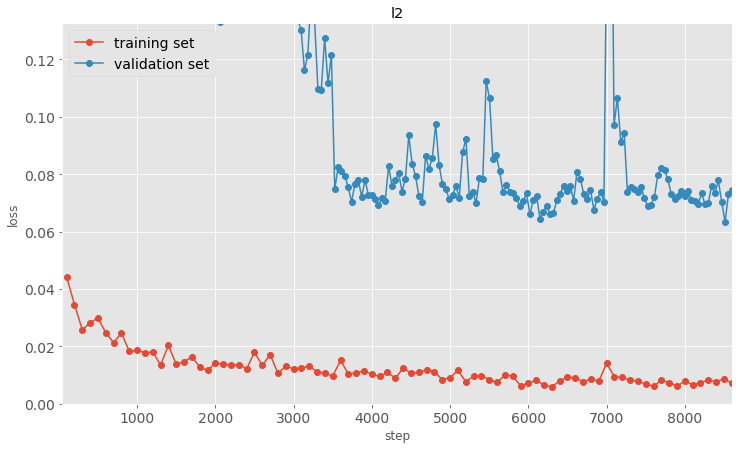

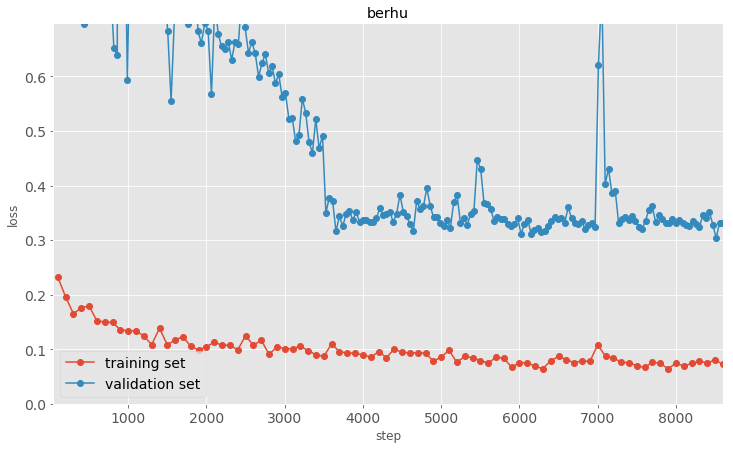

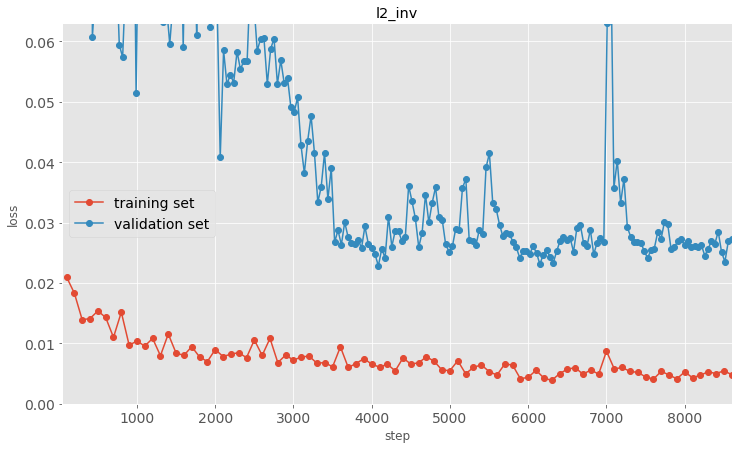

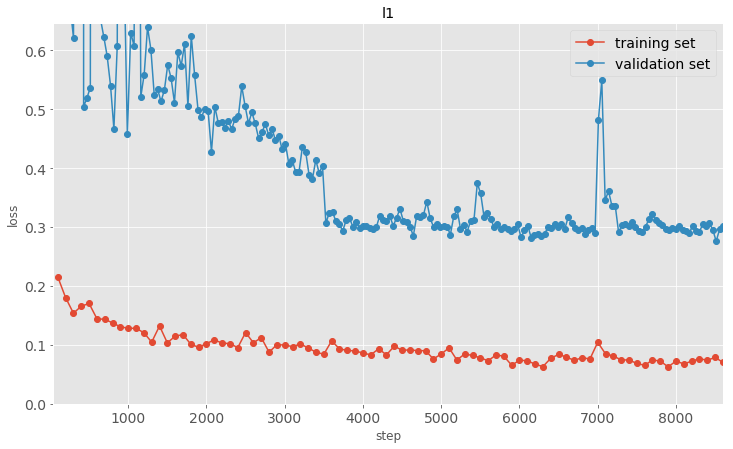

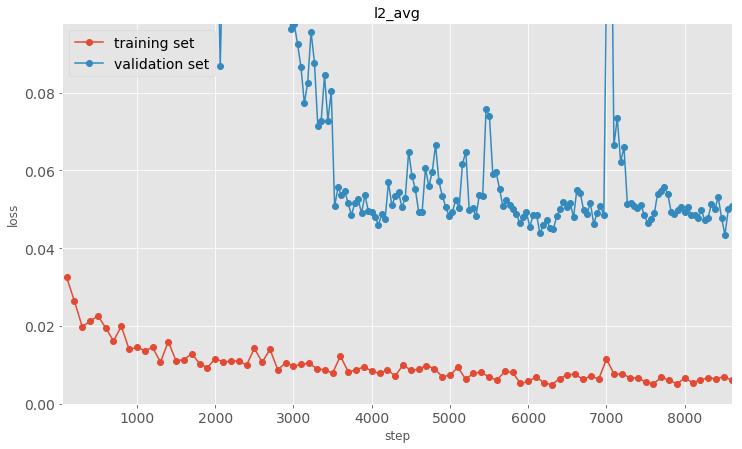

In [19]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_deconv_decoder, 
                    dfs_valid=dfs_valid_resnet_v1_50_deconv_decoder, logy=False, ylim_scale=3)

## Resnet-50 narihira2015 (2 scale):

In [8]:
logs_data_path_s1 = logs_data_path_sintel + 'slim_resnet_v1_50_narihira2015/1/'
lst = import_data_sintel(data_directory=logs_data_path_s1)
dfs_train_resnet_v1_50_narihira2015, dfs_valid_resnet_v1_50_narihira2015 = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


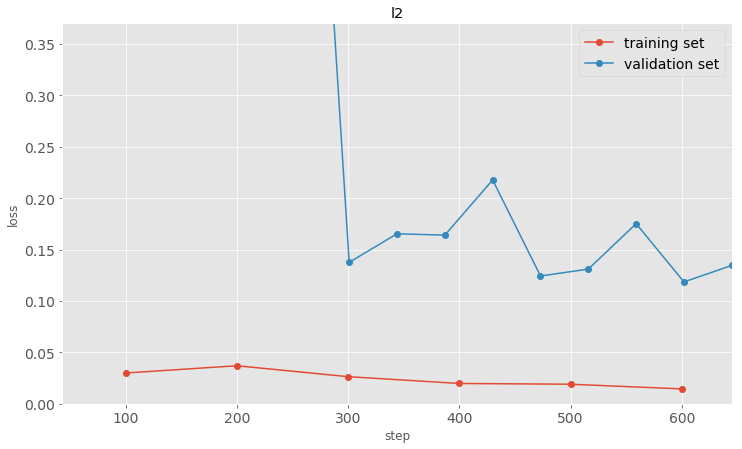

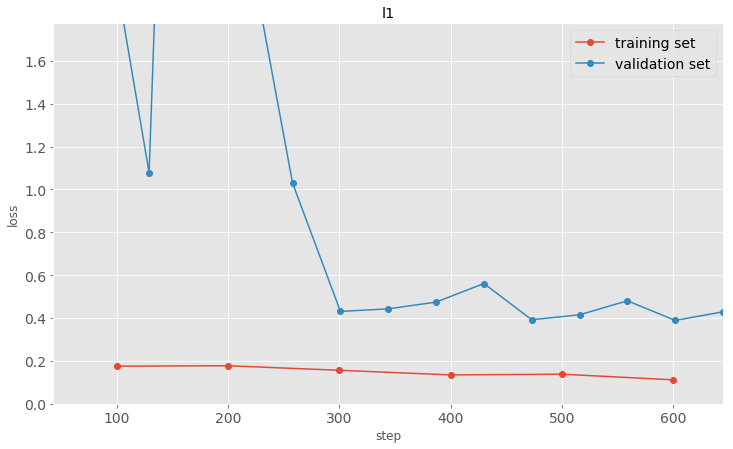

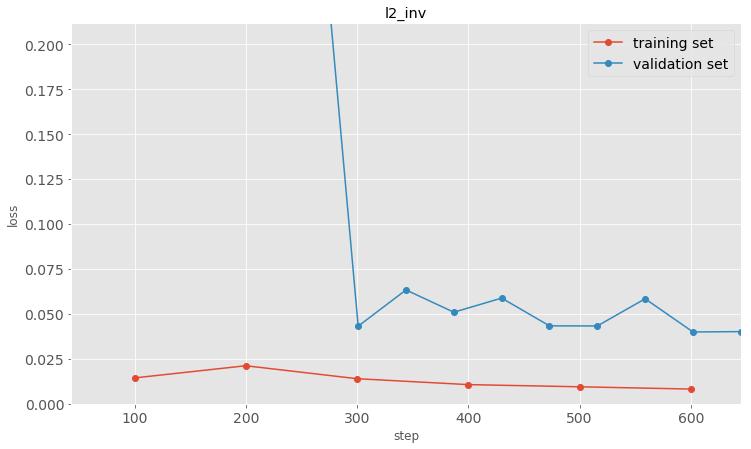

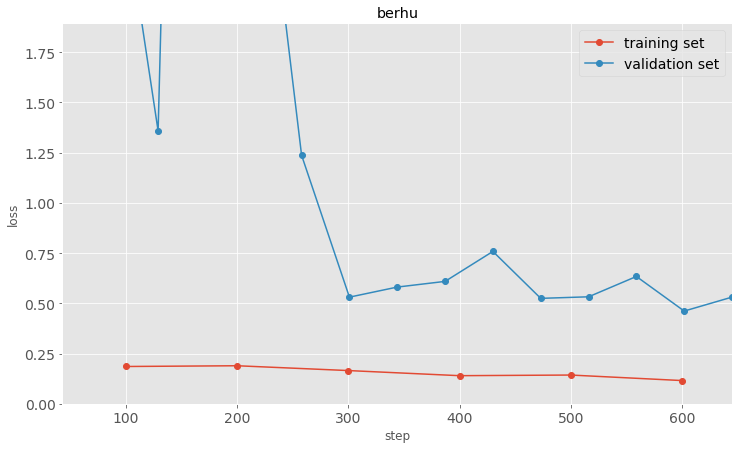

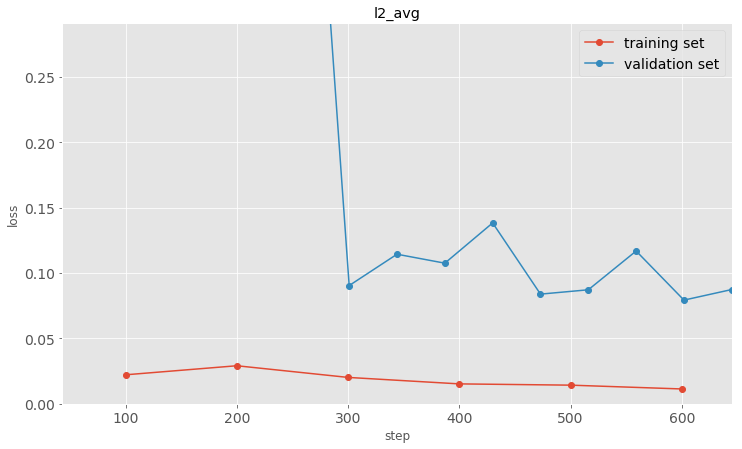

In [9]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_narihira2015, 
                    dfs_valid=dfs_valid_resnet_v1_50_narihira2015, 
                    logy=False, ylim_scale=10)

## Resnet-50 deconv decoder (1 scale, reduced parameters):

In [21]:
logs_data_path_s1 = logs_data_path_sintel + 'slim_resnet_v1_50_deconv_decoder_reduced/1/'
logs_data_path_s2 = logs_data_path_sintel + 'slim_resnet_v1_50_deconv_decoder_reduced/2/'

lst = import_data_sintel(data_directory=logs_data_path_s1)
dfs_train_resnet_v1_50_deconv_decoder_reduced_1, dfs_valid_resnet_v1_50_deconv_decoder_reduced_1 = lst

lst = import_data_sintel(data_directory=logs_data_path_s2)
dfs_train_resnet_v1_50_deconv_decoder_reduced_2, dfs_valid_resnet_v1_50_deconv_decoder_reduced_2 = lst

In [22]:
dfs_train_resnet_v1_50_deconv_decoder_reduced = {}
dfs_valid_resnet_v1_50_deconv_decoder_reduced = {}
for key in dfs_train_resnet_v1_50_deconv_decoder_reduced_1:
    dfs_train_resnet_v1_50_deconv_decoder_reduced[key] = dfs_train_resnet_v1_50_deconv_decoder_reduced_1[key].append(dfs_train_resnet_v1_50_deconv_decoder_reduced_2[key],
                                                                                                     ignore_index=True)
    dfs_valid_resnet_v1_50_deconv_decoder_reduced[key] = dfs_valid_resnet_v1_50_deconv_decoder_reduced_1[key].append(dfs_valid_resnet_v1_50_deconv_decoder_reduced_2[key],
                                                                                                     ignore_index=True)

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


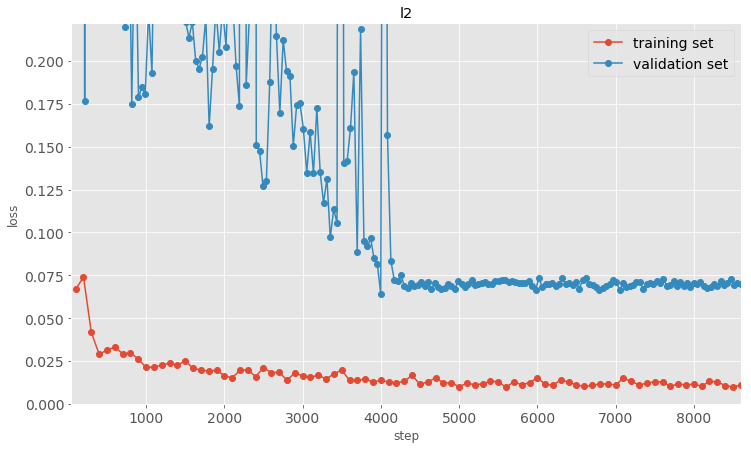

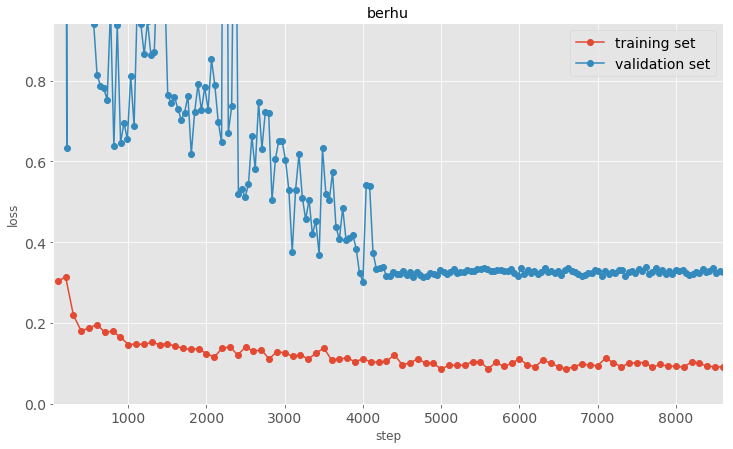

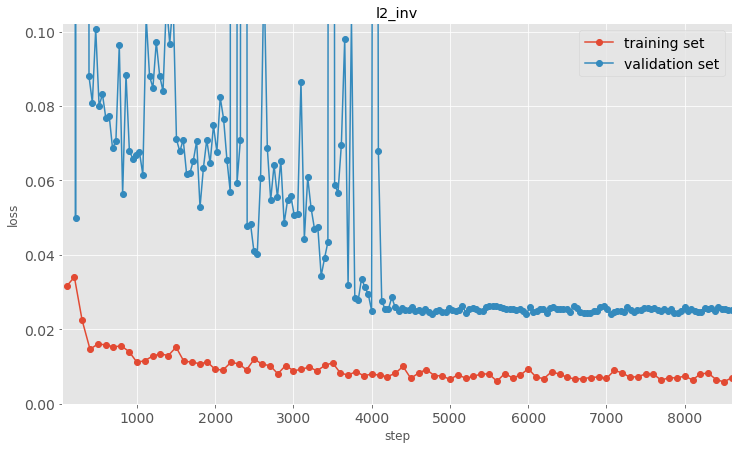

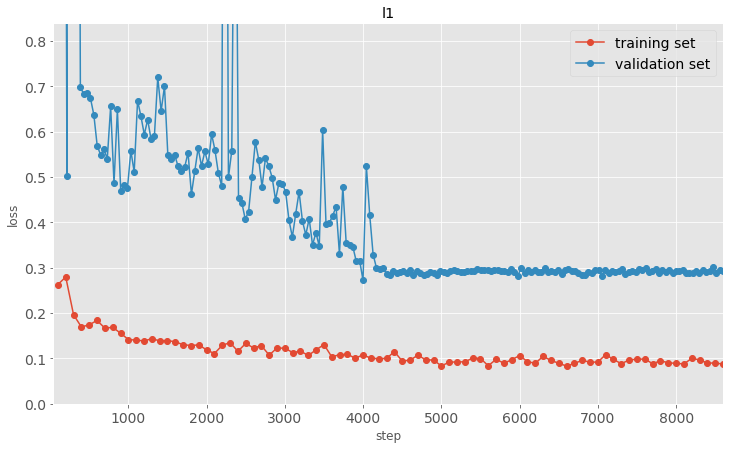

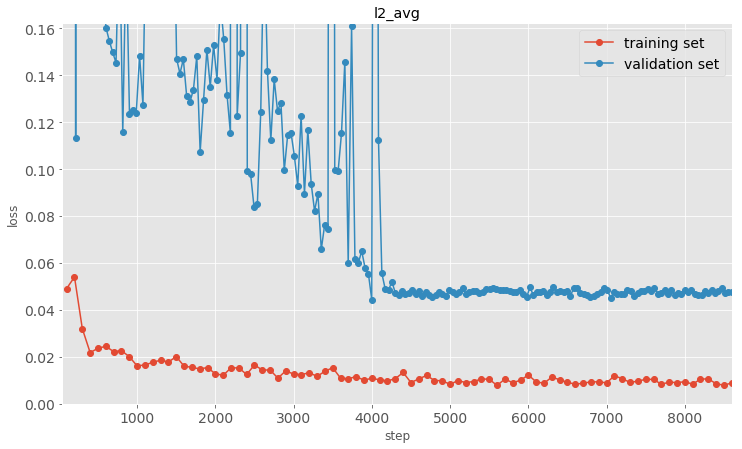

In [23]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_deconv_decoder_reduced, 
                    dfs_valid=dfs_valid_resnet_v1_50_deconv_decoder_reduced, logy=False, ylim_scale=3)

## Resnet-50 narihira2015 (2 scale, reduced parameters):

In [25]:
logs_data_path_s1 = logs_data_path_sintel + 'slim_resnet_v1_50_narihira2015_reduced/1/'
logs_data_path_s2 = logs_data_path_sintel + 'slim_resnet_v1_50_narihira2015_reduced/2/'

lst = import_data_sintel(data_directory=logs_data_path_s1)
dfs_train_resnet_v1_50_narihira2015_reduced_1, dfs_valid_resnet_v1_50_narihira2015_reduced_1 = lst

lst = import_data_sintel(data_directory=logs_data_path_s2)
dfs_train_resnet_v1_50_narihira2015_reduced_2, dfs_valid_resnet_v1_50_narihira2015_reduced_2 = lst

In [26]:
dfs_train_resnet_v1_50_narihira2015_reduced = {}
dfs_valid_resnet_v1_50_narihira2015_reduced = {}
for key in dfs_train_resnet_v1_50_deconv_decoder_reduced_1:
    dfs_train_resnet_v1_50_narihira2015_reduced[key] = dfs_train_resnet_v1_50_narihira2015_reduced_1[key].append(dfs_train_resnet_v1_50_narihira2015_reduced_2[key],
                                                                                                     ignore_index=True)
    dfs_valid_resnet_v1_50_narihira2015_reduced[key] = dfs_valid_resnet_v1_50_narihira2015_reduced_1[key].append(dfs_valid_resnet_v1_50_narihira2015_reduced_2[key],
                                                                                                     ignore_index=True)

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


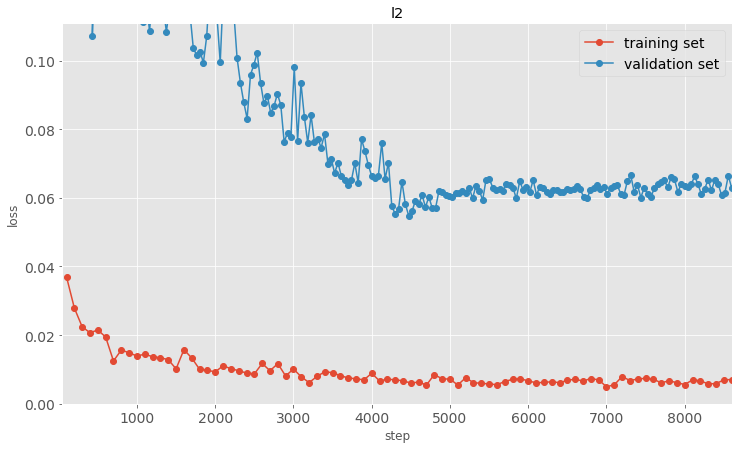

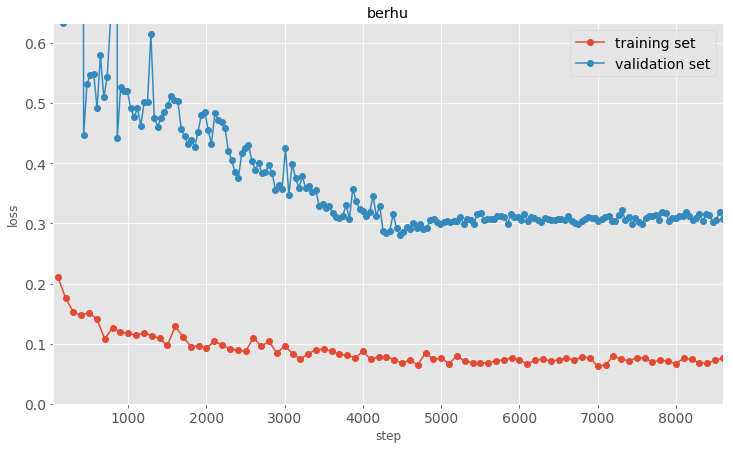

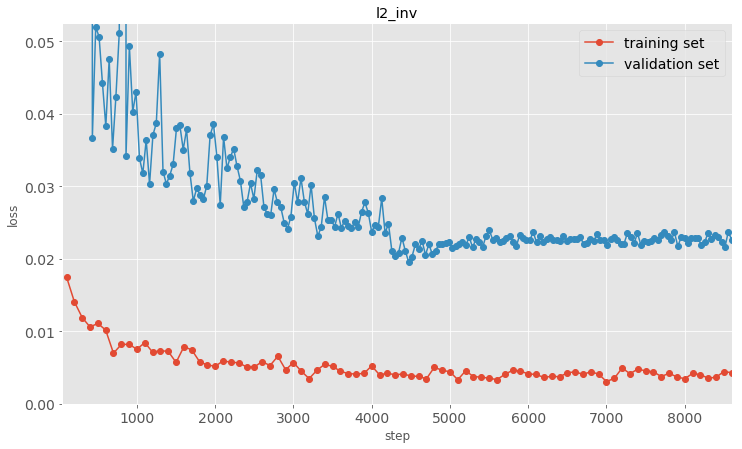

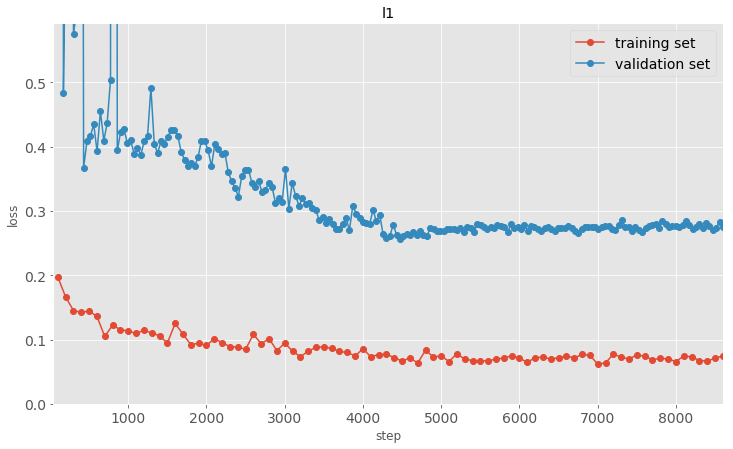

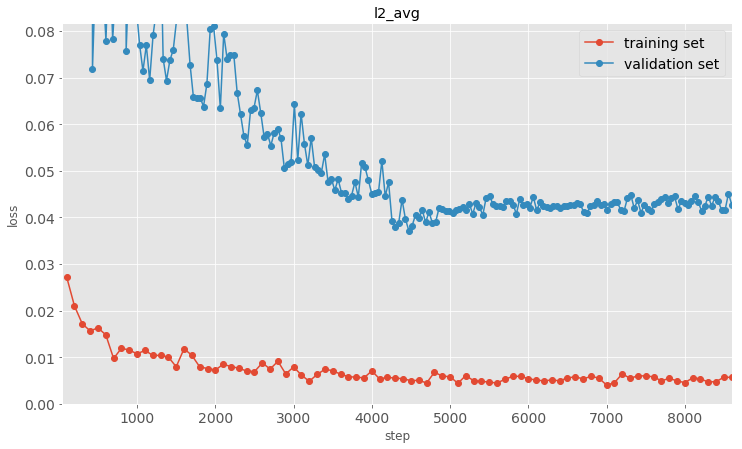

In [27]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_narihira2015_reduced, 
                    dfs_valid=dfs_valid_resnet_v1_50_narihira2015_reduced, logy=False, ylim_scale=3)

## VGG-16 deconv_decoder (1 scale):

In [10]:
logs_data_path_s1 = logs_data_path_sintel + 'slim_vgg16_deconv_decoder/1/'
lst = import_data_sintel(data_directory=logs_data_path_s1)
dfs_train_vgg16_deconv_decoder, dfs_valid_vgg16_deconv_decoder = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


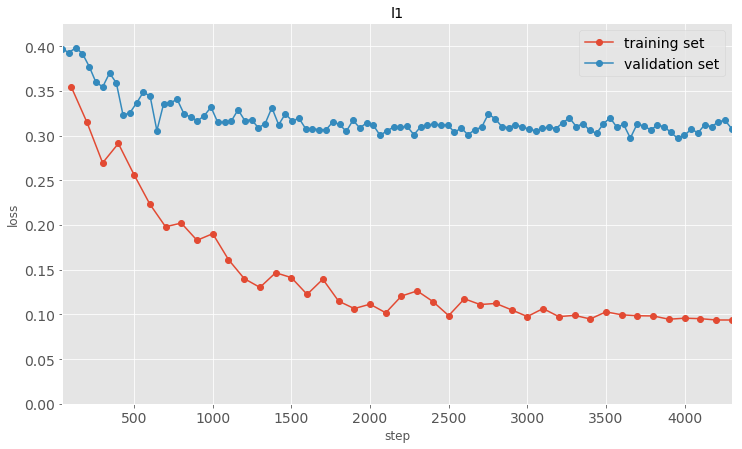

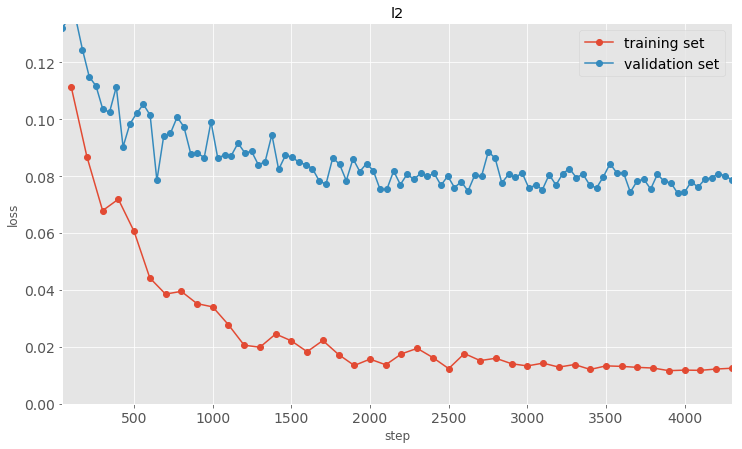

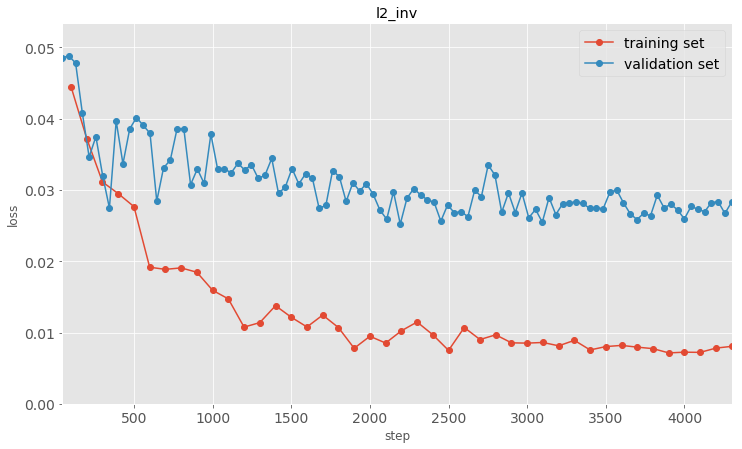

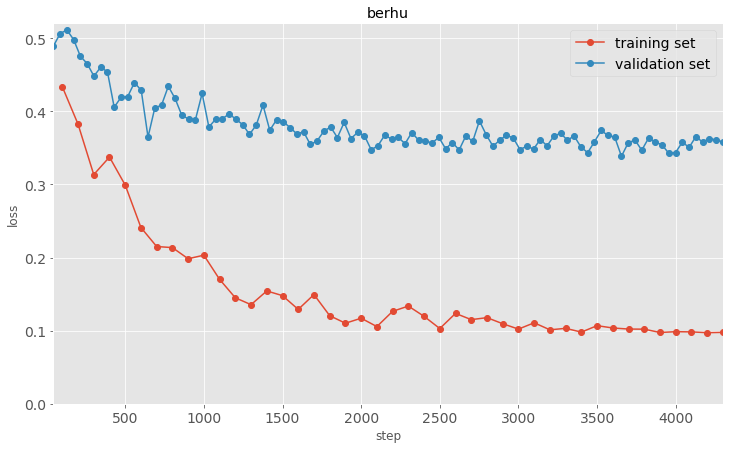

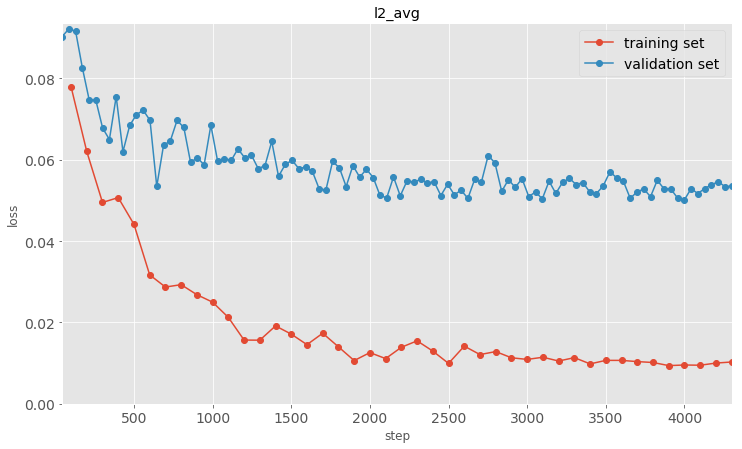

In [11]:
plot_all_loss_pairs(dfs_train=dfs_train_vgg16_deconv_decoder, 
                    dfs_valid=dfs_valid_vgg16_deconv_decoder, 
                    logy=False, ylim_scale=1.2)

## VGG-16 Narihira2015 (2 scale):

In [12]:
logs_data_path_s1 = logs_data_path_sintel + 'slim_vgg16_narihira2015/1/'
logs_data_path_s2 = logs_data_path_sintel + 'slim_vgg16_narihira2015/2/'

lst = import_data_sintel(data_directory=logs_data_path_s1)
dfs_train_vgg16_narihira2015_1, dfs_valid_vgg16_narihira2015_1 = lst

lst = import_data_sintel(data_directory=logs_data_path_s2)
dfs_train_vgg16_narihira2015_2, dfs_valid_vgg16_narihira2015_2 = lst

In [13]:
dfs_train_vgg16_narihira2015 = {}
dfs_valid_vgg16_narihira2015 = {}
for key in dfs_train_vgg16_narihira2015_1:
    dfs_train_vgg16_narihira2015[key] = dfs_train_vgg16_narihira2015_1[key].append(dfs_train_vgg16_narihira2015_2[key],
                                                                                   ignore_index=True)
    dfs_valid_vgg16_narihira2015[key] = dfs_valid_vgg16_narihira2015_1[key].append(dfs_valid_vgg16_narihira2015_2[key],
                                                                                   ignore_index=True)

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


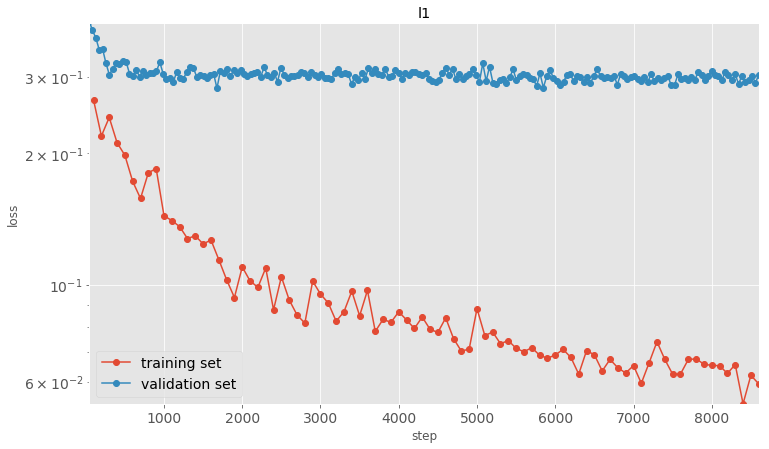

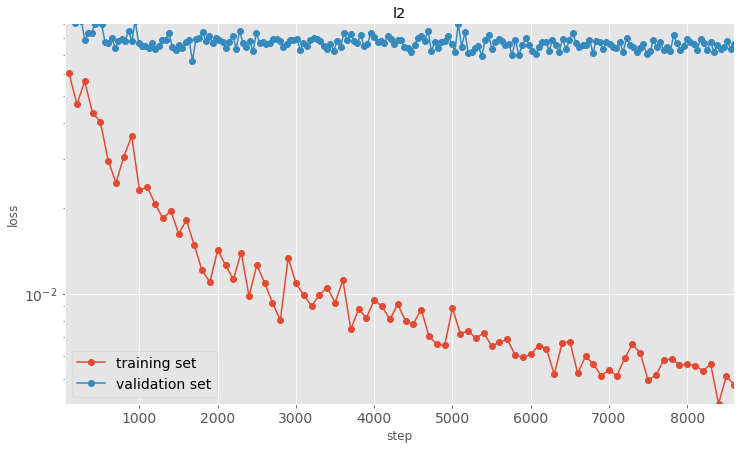

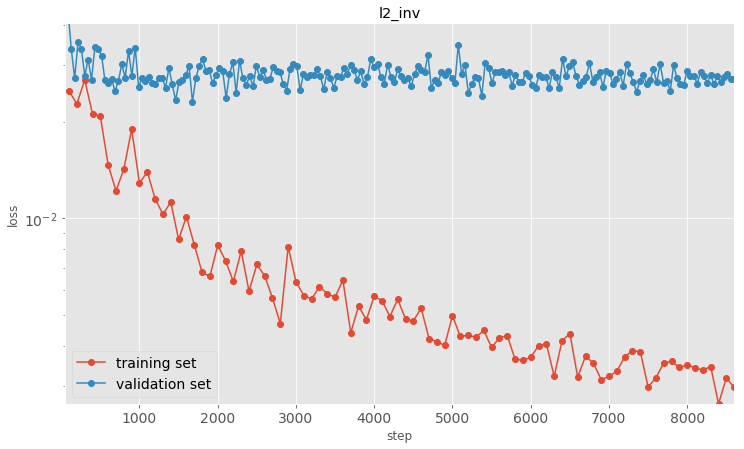

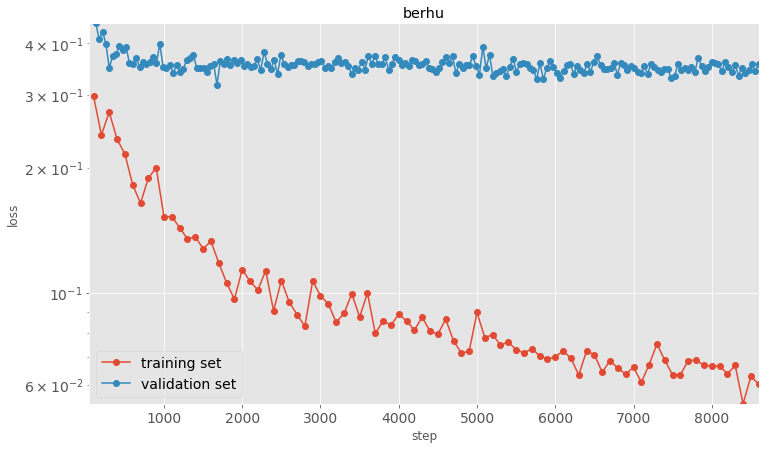

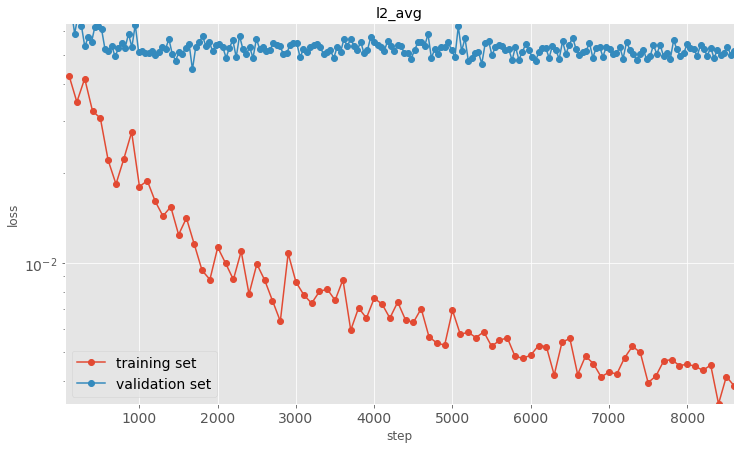

In [14]:
plot_all_loss_pairs(dfs_train=dfs_train_vgg16_narihira2015, 
                    dfs_valid=dfs_valid_vgg16_narihira2015, 
                    logy=True, ylim_scale=1.5)

# IIW

In [17]:
logs_data_path_iiw = logs_data_path + 'iiw/'

## Resnet-50 deconv decoder (1 scale):

### lambda = 0.5 (mhdl)

In [18]:
logs_data_path_iiw1 = logs_data_path_iiw + 'slim_resnet_v1_50_deconv_decoder/l1_05mhdl/1/'
lst = import_data_sintel(data_directory=logs_data_path_iiw1)
dfs_train_resnet_v1_50_deconv_decoder_iiw, dfs_valid_resnet_v1_50_deconv_decoder_iiw = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


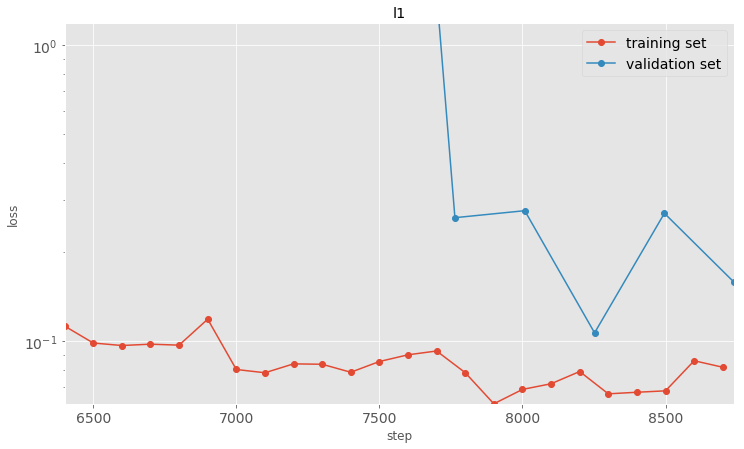

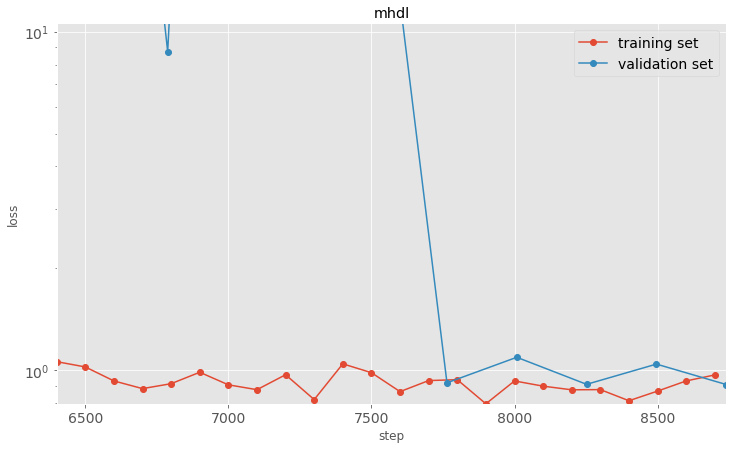

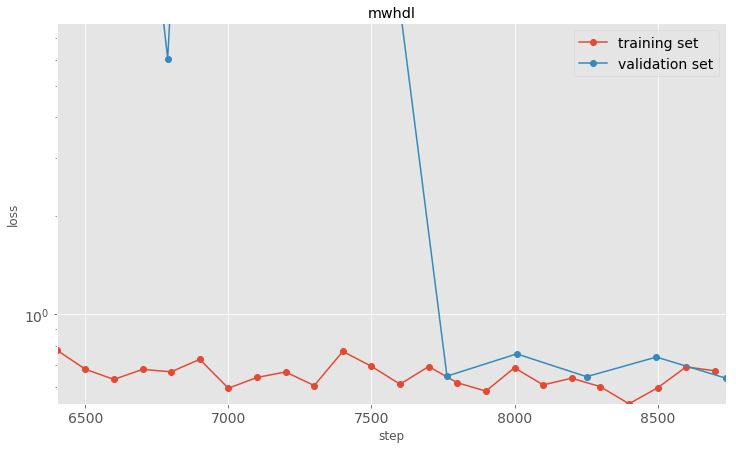

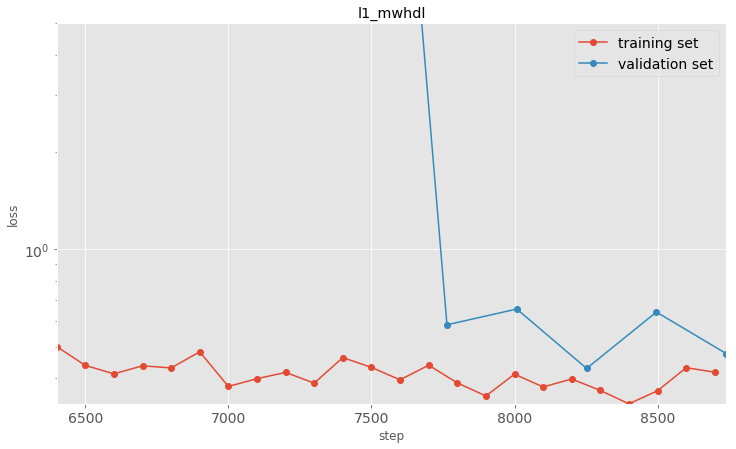

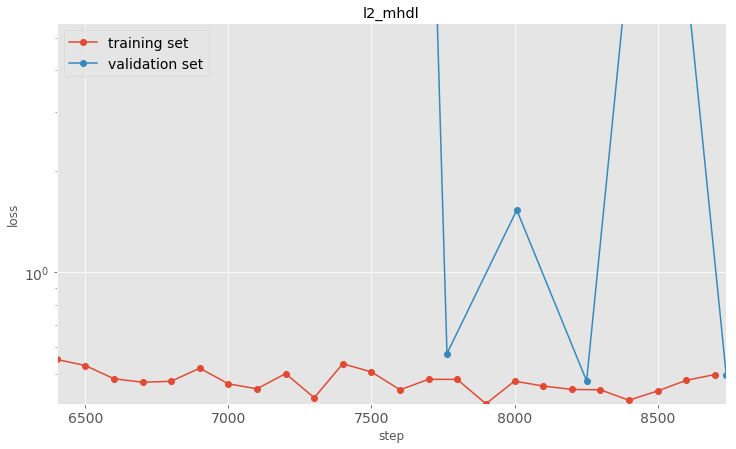

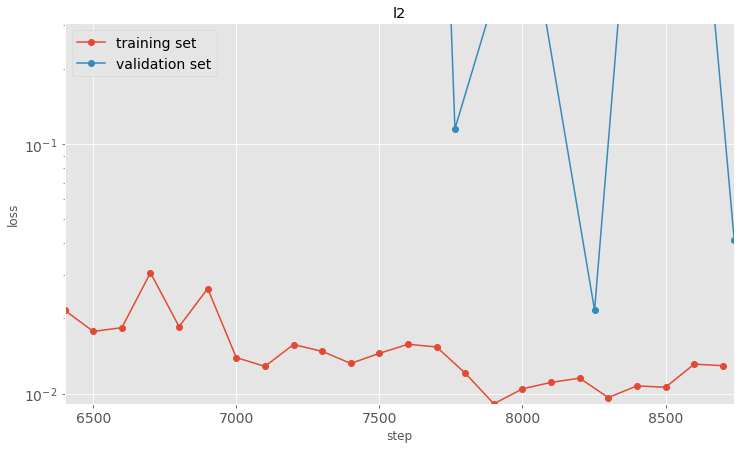

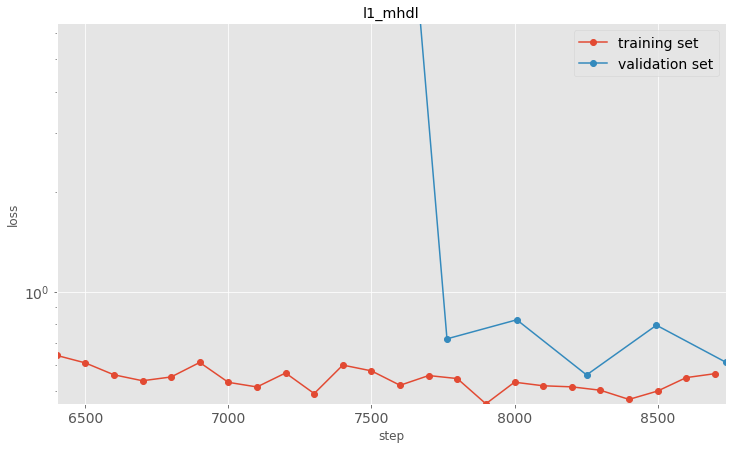

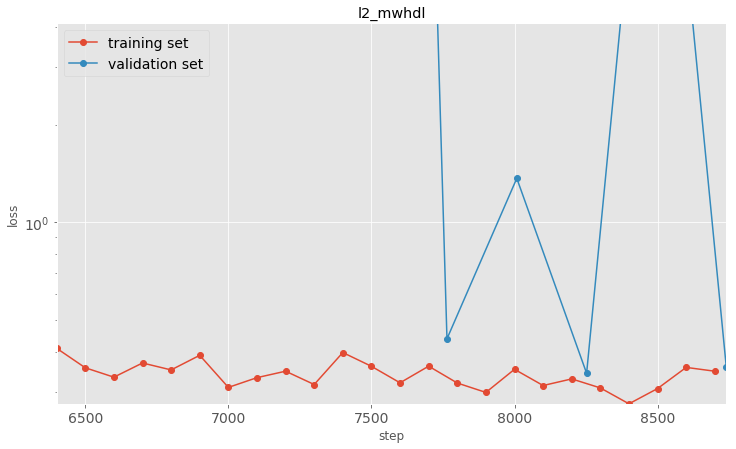

In [20]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_deconv_decoder_iiw, 
                    dfs_valid=dfs_valid_resnet_v1_50_deconv_decoder_iiw, 
                    logy=True, ylim_scale=10)

### lambda = 1.0 (mhdl)        

In [30]:
logs_data_path_iiw1 = logs_data_path_iiw + 'slim_resnet_v1_50_deconv_decoder/l1_10mhdl/1/'
lst = import_data_sintel(data_directory=logs_data_path_iiw1)
dfs_train_resnet_v1_50_deconv_decoder_iiw, dfs_valid_resnet_v1_50_deconv_decoder_iiw = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


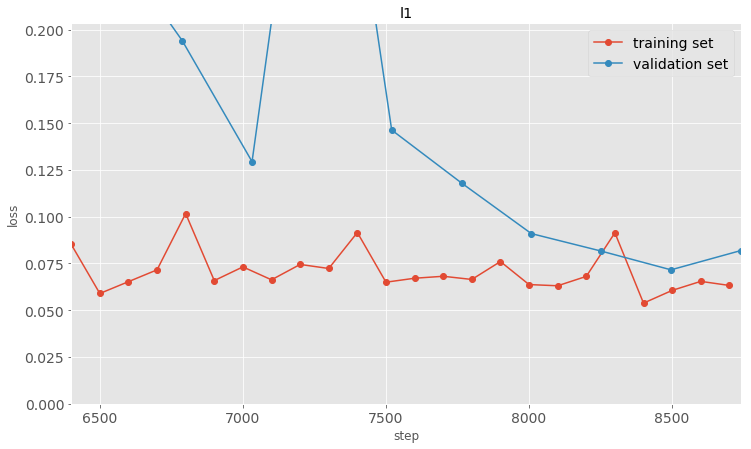

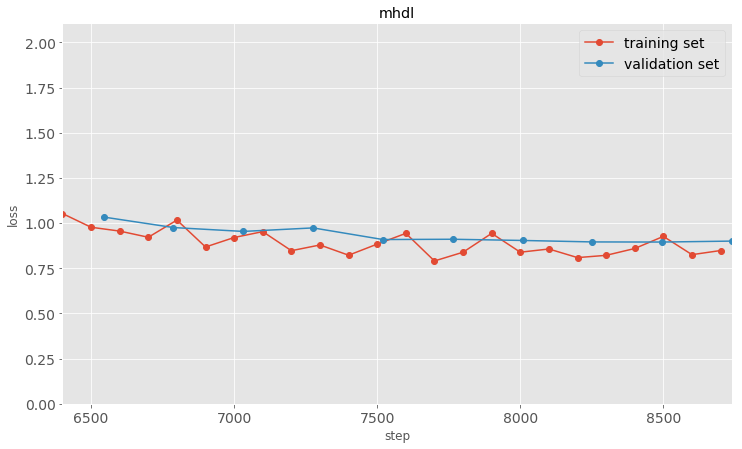

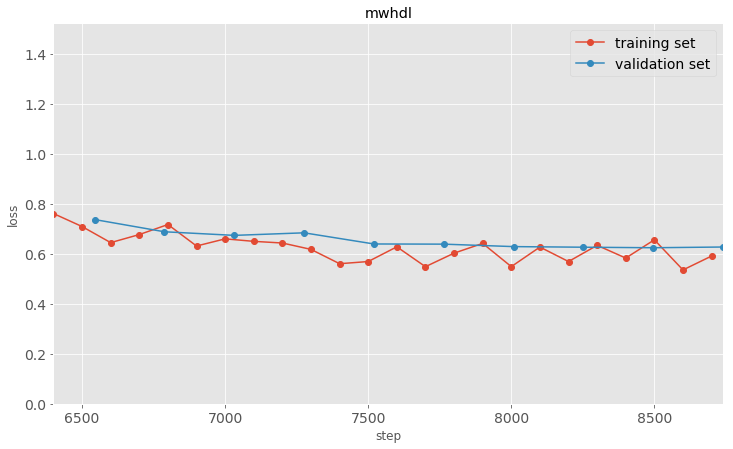

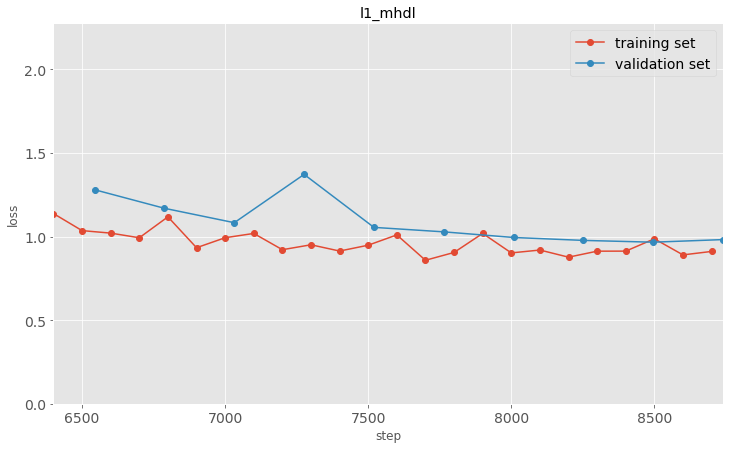

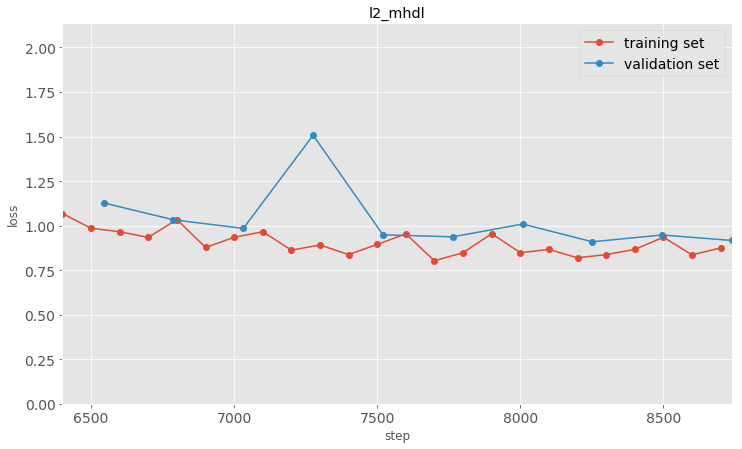

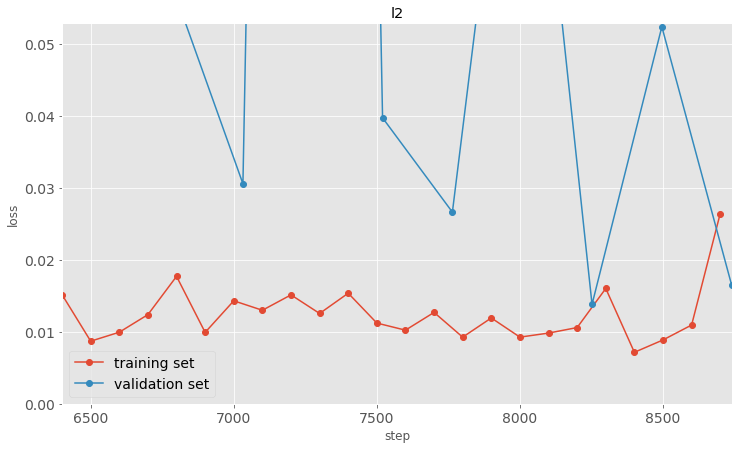

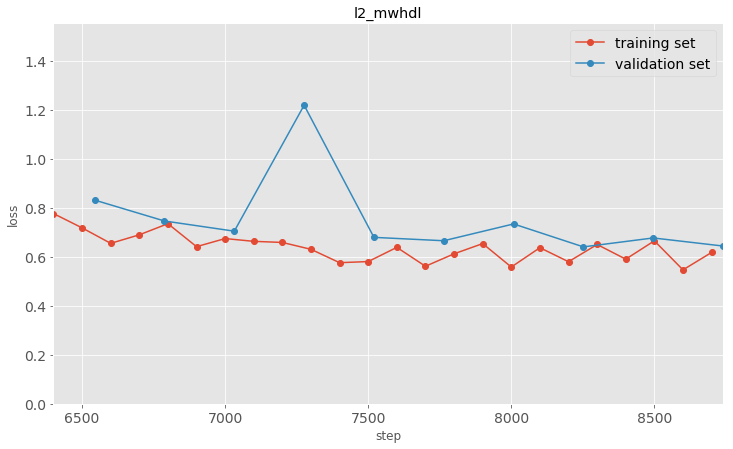

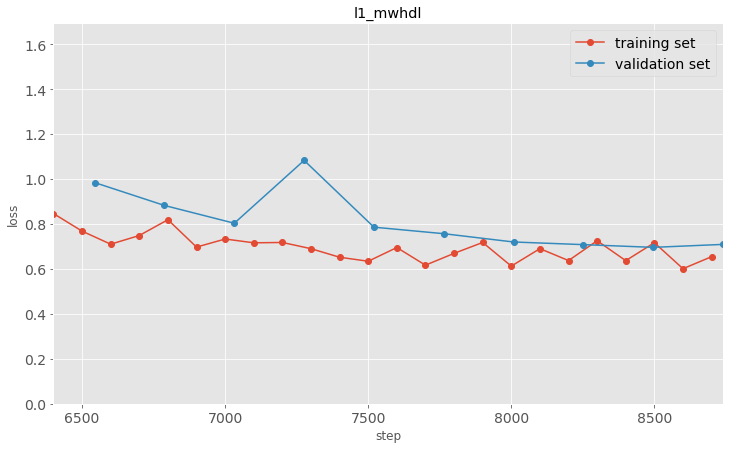

In [32]:
plot_all_loss_pairs(dfs_train=dfs_train_resnet_v1_50_deconv_decoder_iiw, 
                    dfs_valid=dfs_valid_resnet_v1_50_deconv_decoder_iiw, 
                    logy=False, ylim_scale=2)

## vgg-16 narihira2015:

### lambda = 1.0 (mhdl)

In [24]:
logs_data_path_iiw1 = logs_data_path_iiw + 'slim_vgg16_narihira2015/l1_10mhdl/1/'
lst = import_data_sintel(data_directory=logs_data_path_iiw1)
dfs_train_vgg16_narihira2015_iiw, dfs_valid_vgg16_narihira2015_iiw = lst

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


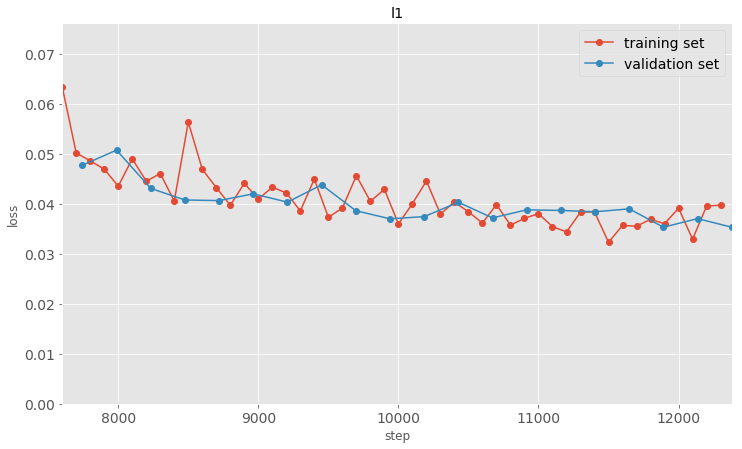

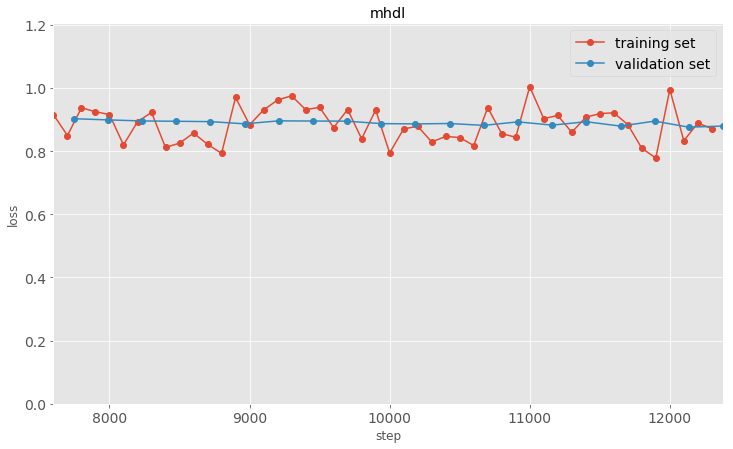

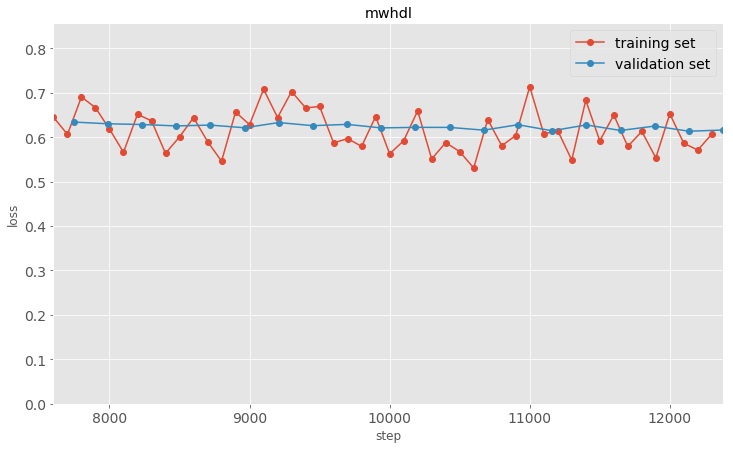

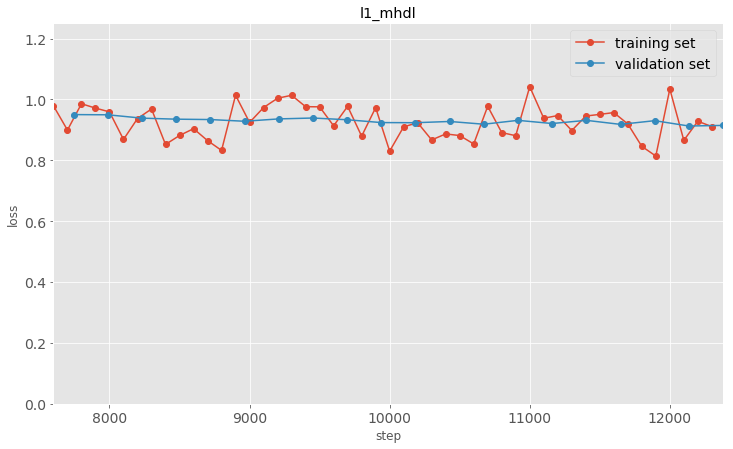

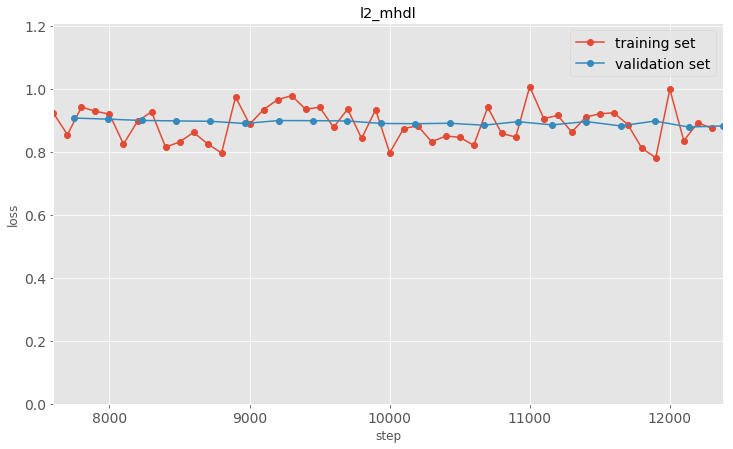

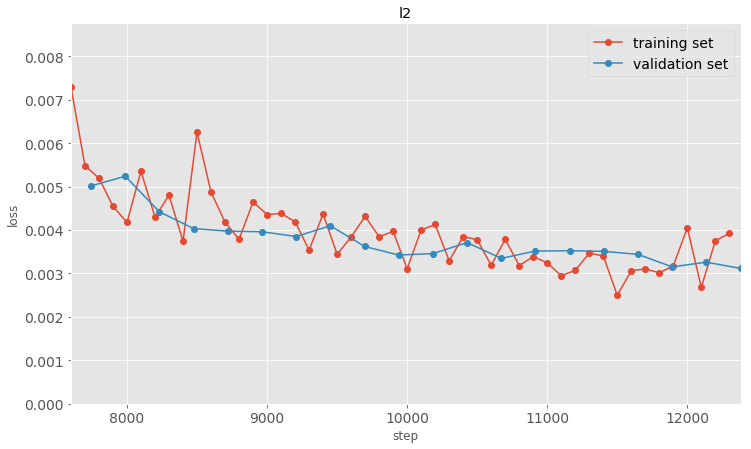

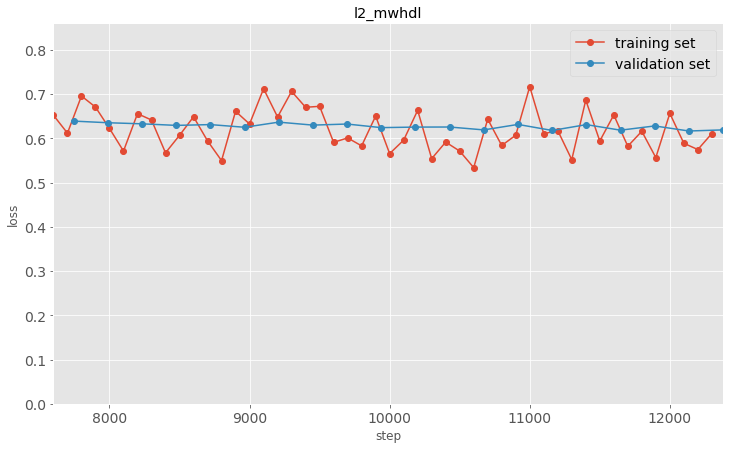

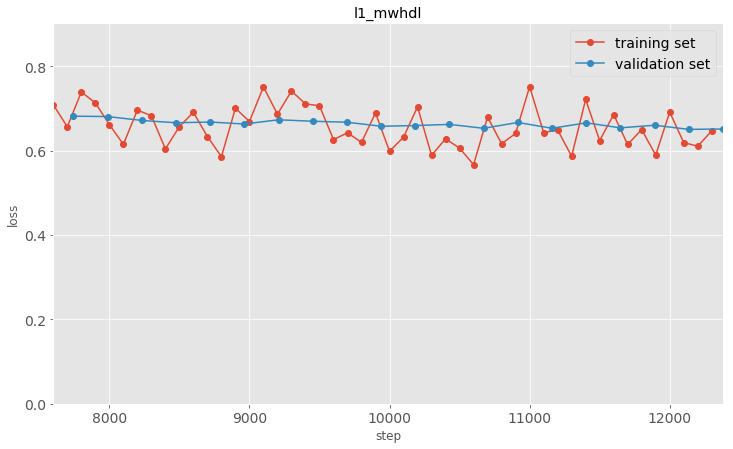

In [28]:
plot_all_loss_pairs(dfs_train=dfs_train_vgg16_narihira2015_iiw, 
                    dfs_valid=dfs_valid_vgg16_narihira2015_iiw, 
                    logy=False, ylim_scale=1.2)